<a href="https://colab.research.google.com/github/Kushal-H-Choudhary/python/blob/main/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [3]:
data_dir = '/content/drive/MyDrive/PlantDisease/Data'
categories = os.listdir(data_dir)

images=[]
labels=[]
for category in categories:
  print(category)
  folder_path=os.path.join(data_dir,category)
  for img_file in os.listdir(folder_path):
    img_path=os.path.join(folder_path,img_file)
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.resize(img, (64, 64))
      images.append(img)
      labels.append(category)


images =np.array(images)

Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [4]:
x = np.array(images)
y = np.array(labels)

print("Labels:",np.unique(y))
print("Data shape: ",x.shape)

Labels: ['Tomato___Bacterial_spot' 'Tomato___Early_blight' 'Tomato___Late_blight'
 'Tomato___Target_Spot' 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
 'Tomato___Tomato_mosaic_virus' 'Tomato___healthy']
Data shape:  (13109, 64, 64, 3)


Class Distribution:
Tomato___Tomato_Yellow_Leaf_Curl_Virus    1991
Tomato___Early_blight                     1930
Tomato___healthy                          1926
Tomato___Late_blight                      1861
Tomato___Target_Spot                      1859
Tomato___Tomato_mosaic_virus              1820
Tomato___Bacterial_spot                   1722
Name: count, dtype: int64


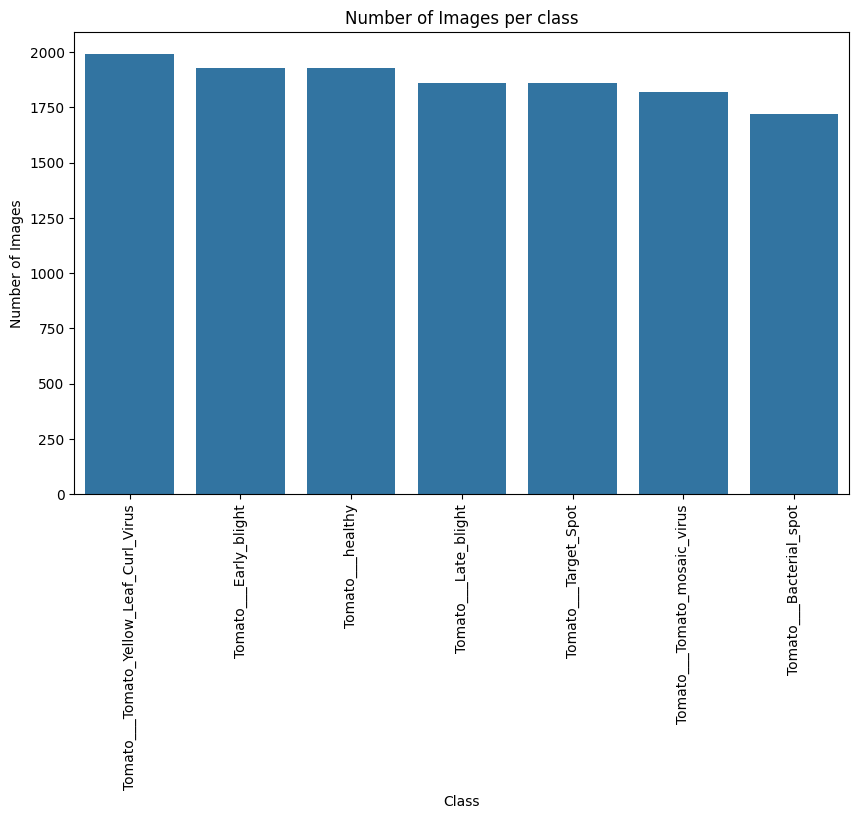

In [5]:
class_counts = pd.Series(y).value_counts()
print("Class Distribution:")
print(class_counts)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Images per class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [6]:
valid_images=[]
valid_labels=[]

for img,label in zip(x,y):
  if img.shape==(64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

x=np.array(valid_images)
y=np.array(valid_labels)
print("Cleaned Data Shape: ",x.shape)

Cleaned Data Shape:  (13109, 64, 64, 3)


In [7]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

class_names = le.classes_
class_names

array(['Tomato___Bacterial_spot', 'Tomato___Early_blight',
       'Tomato___Late_blight', 'Tomato___Target_Spot',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'], dtype='<U38')

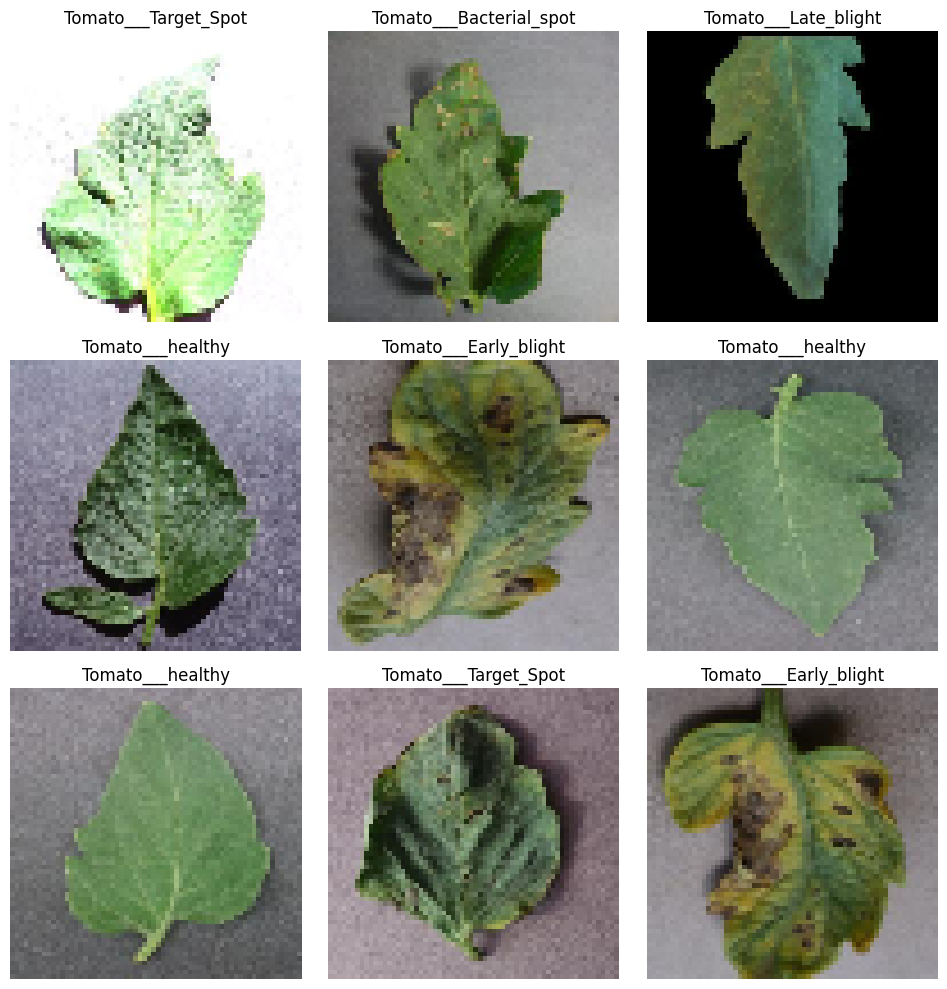

In [8]:
import random

plt.figure(figsize=(10,10))
for i in range(9):
  idx = random.randint(0,len(x))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(x[idx],cv2.COLOR_BGR2RGB))
  plt.title(class_names[y_encoded[idx]])
  plt.axis("off")
  plt.tight_layout()
plt.show()

In [9]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

hist_features = np.array([extract_color_histogram(img) for img in x])
x_features = np.array(hist_features)

In [10]:
x_features.shape

(13109, 512)

In [11]:
model = SVC(kernel='rbf', C=10, gamma='scale')


In [12]:
x_trian,x_test,y_train,y_test = train_test_split(x_features,y_encoded,test_size=0.2,random_state=42)


model.fit(x_trian,y_train)

y_pred = model.predict(x_test)


Accuracy: 0.9740655987795576
F1 Score: 0.9740571910407216


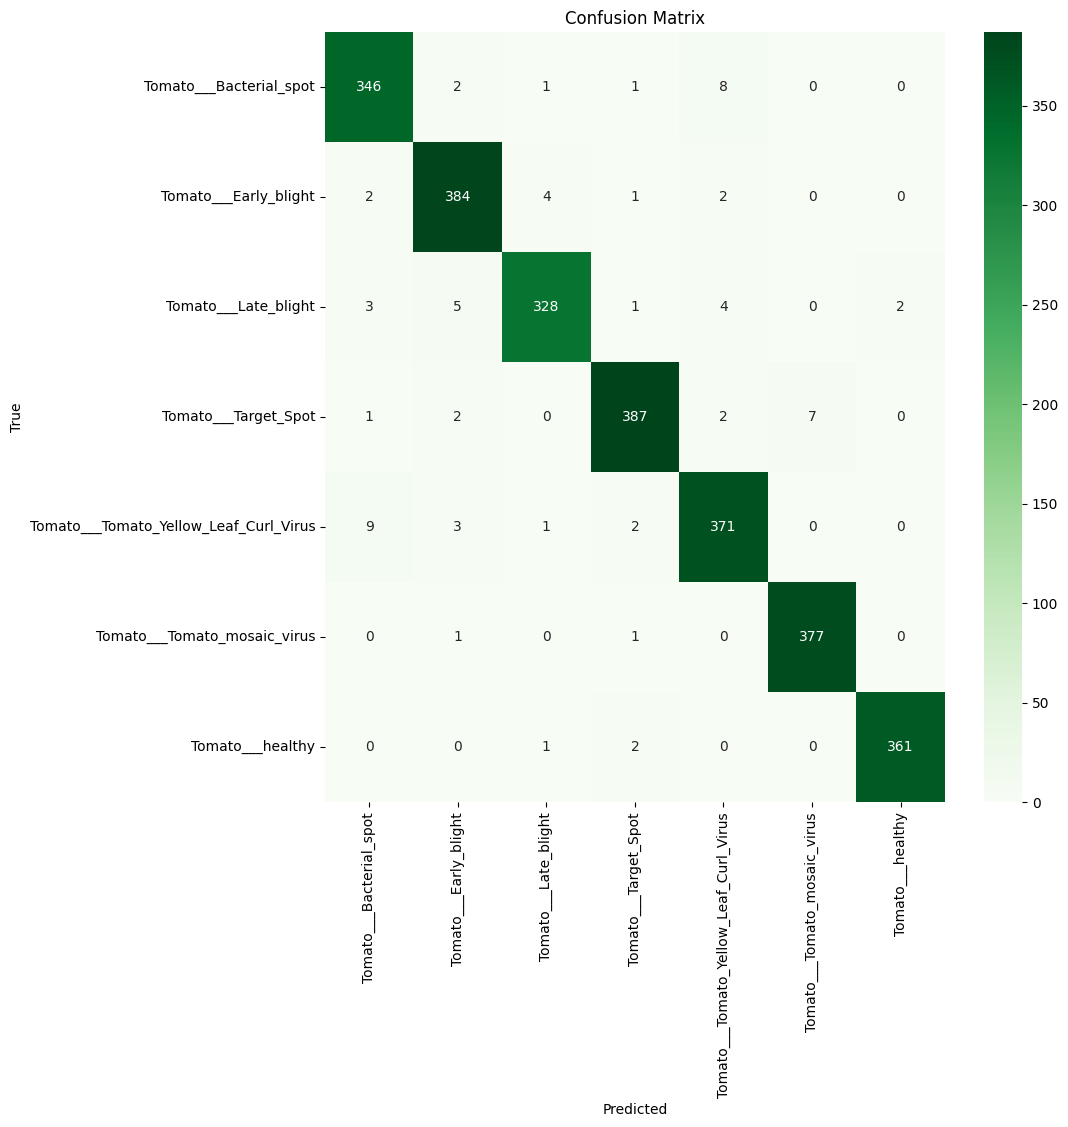

In [13]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

f1 = f1_score(y_test,y_pred,average='weighted')
print("F1 Score:",f1)

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens',xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [14]:
print("Classification Report:")
print(classification_report(y_test,y_pred,target_names=class_names))

Classification Report:
                                        precision    recall  f1-score   support

               Tomato___Bacterial_spot       0.96      0.97      0.96       358
                 Tomato___Early_blight       0.97      0.98      0.97       393
                  Tomato___Late_blight       0.98      0.96      0.97       343
                  Tomato___Target_Spot       0.98      0.97      0.97       399
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.96      0.96      0.96       386
          Tomato___Tomato_mosaic_virus       0.98      0.99      0.99       379
                      Tomato___healthy       0.99      0.99      0.99       364

                              accuracy                           0.97      2622
                             macro avg       0.97      0.97      0.97      2622
                          weighted avg       0.97      0.97      0.97      2622

